# Метод Рунге-кута

In [2]:
import numpy as np
import scipy.linalg as sla
from math import sqrt, cos, log

In [3]:
a = np.array([[0, 0, 0], [2/3, 0, 0], [0, 2/3, 0]])
c = np.array([0, 2/3, 2/3])
b = np.array([2/8, 2/8, 3/8])

In [4]:
def f(x, u):
	return [u[1], -u[0] * cos(x)]

In [5]:
def u_next(u, x, h, a, b, c):
	
	s = a.shape[0]
	k = np.zeros((s, 2))
	for i in range (0, s):
		ui = u
		xi = x + c[i	] * h
		for j in range(0, i):
			a_ij = a[i, j]
			k_j = k[j, :]
			ui = ui +  a_ij * h * k_j
		k[i, :] = f(xi, ui)
	
	result = u
	for i in range(0, s):
		result = result + h * b[i] * k[i, :]

	return result

In [6]:
import matplotlib.pyplot as plt

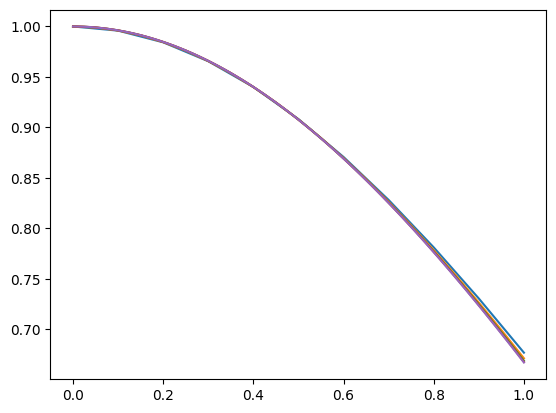

In [7]:
h_list = [0.1]
n = 4
for i in range(0, n):
    h_list.append(h_list[i] / 2)
y_list = []
x_list =[]

for h in h_list:
    u = []
    u.append([1, 0])
    y = []
    x = [0.0]
    for i in range(0, int(1 / h)):
        x.append(x[i] + h)
        u.append(u_next(u[i], x[i] + h, h, a, b, c))
    y = []
    yy = []
    for elem in u:
        y.append(elem[0])
        yy.append(elem[1])
    y_list.append(y)
    x_list.append(x)
    plt.plot(x, y)
    # plt.plot(y, yy)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

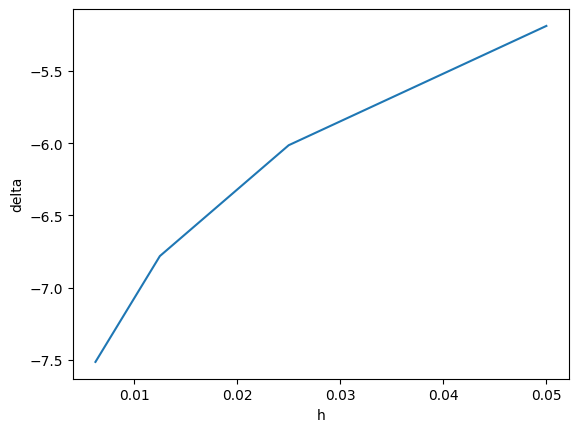

In [9]:
h_current = h_list[0]
x_current = x_list[0]
y_current = y_list[0]

h_prev = h_current
x_prev = x_current
y_prev = y_current

h_v = []
delta_v = []

for i in range(1, len(h_list)):
    max_delta = 0
 
    h_prev = h_current
    x_prev = x_current
    y_prev = y_current
    h_current = h_list[i]
    x_current = x_list[i]
    y_current = y_list[i]
    for j in range (0, len(x_prev)):
        if abs(y_current[2 * j] - y_prev[j]) > max_delta:
            max_delta = abs(y_current[2 * j] - y_prev[j])
    h_v.append(h_current)
    delta_v.append(log(max_delta))
plt.plot(h_v, delta_v)
plt.xlabel(r"h")
plt.ylabel(r"delta")
plt.show
    